In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# load data
data = pd.read_csv('dataset/dataset.csv') 
data = data.dropna()


In [3]:
data.head(5)

,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,direction
24,64,80,448,432,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
25,64,96,448,416,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
26,64,112,448,400,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
27,64,128,448,384,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
28,64,144,448,368,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3


In [5]:
data = data.iloc[1:]
data

,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,direction
25,64,96,448,416,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
26,64,112,448,400,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
27,64,128,448,384,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
28,64,144,448,368,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
29,64,160,448,352,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11431,432,144,80,368,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
11432,432,160,80,352,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
11433,432,176,80,336,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
11434,432,192,80,320,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3


In [6]:
X = data.iloc[:,:-1].astype(int).values # همه ردیف ها تا ستون اخر
Y = data.iloc[: ,-1].astype(int).values # همه ردیف ها فقط ستون اخرشون


In [7]:
X , Y

(array([[ 64,  96, 448, ...,   1,   0,   0],
        [ 64, 112, 448, ...,   1,   0,   0],
        [ 64, 128, 448, ...,   1,   0,   0],
        ...,
        [432, 176,  80, ...,   1,   0,   0],
        [432, 192,  80, ...,   1,   0,   0],
        [432, 208,  80, ...,   1,   0,   0]]),
 array([3, 3, 3, ..., 3, 3, 3]))

In [8]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)

Y_train = Y_train.reshape(-1,1)
Y_test  = Y_test.reshape(-1,1)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12 , activation='sigmoid') , 
    tf.keras.layers.Dense(30,activation='relu') , 
    tf.keras.layers.Dense(16,activation='relu') , 
    tf.keras.layers.Dense(4 , activation='softmax')
])

In [9]:
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((4617, 12), (4617, 1), (1155, 12), (1155, 1))

In [10]:
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy' , 
              metrics=['accuracy']
)


In [45]:
output = model.fit(X_train,Y_train,epochs=108)

Epoch 1/108


145/145 [==============================] - 2s 2ms/step - loss: 1.0360 - accuracy: 0.4806
Epoch 2/108
145/145 [==============================] - 0s 3ms/step - loss: 0.8287 - accuracy: 0.5226
Epoch 3/108
145/145 [==============================] - 0s 2ms/step - loss: 0.8218 - accuracy: 0.5404
Epoch 4/108
145/145 [==============================] - 0s 2ms/step - loss: 0.8173 - accuracy: 0.5408
Epoch 5/108
145/145 [==============================] - 0s 2ms/step - loss: 0.8117 - accuracy: 0.5400
Epoch 6/108
145/145 [==============================] - 0s 2ms/step - loss: 0.8053 - accuracy: 0.5480
Epoch 7/108
145/145 [==============================] - 0s 2ms/step - loss: 0.8018 - accuracy: 0.5530
Epoch 8/108
145/145 [==============================] - 0s 2ms/step - loss: 0.7964 - accuracy: 0.5577
Epoch 9/108
145/145 [==============================] - 0s 2ms/step - loss: 0.7877 - accuracy: 0.5644
Epoch 10/108
145/145 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.8144
E

In [46]:
loss , accuracy = model.evaluate(X_test,Y_test)

37/37 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9991


In [47]:
model.save('weights/snake_game_model.h5')


c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


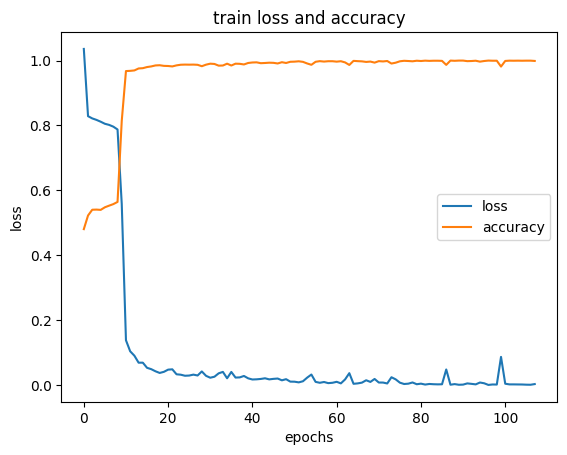

In [48]:

plt.plot(output.history["loss"], label='loss')
plt.plot(output.history["accuracy"], label='accuracy')
plt.title("train loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()